## Video Games Sales Prediction

## Data preprocessing

(10833, 17)


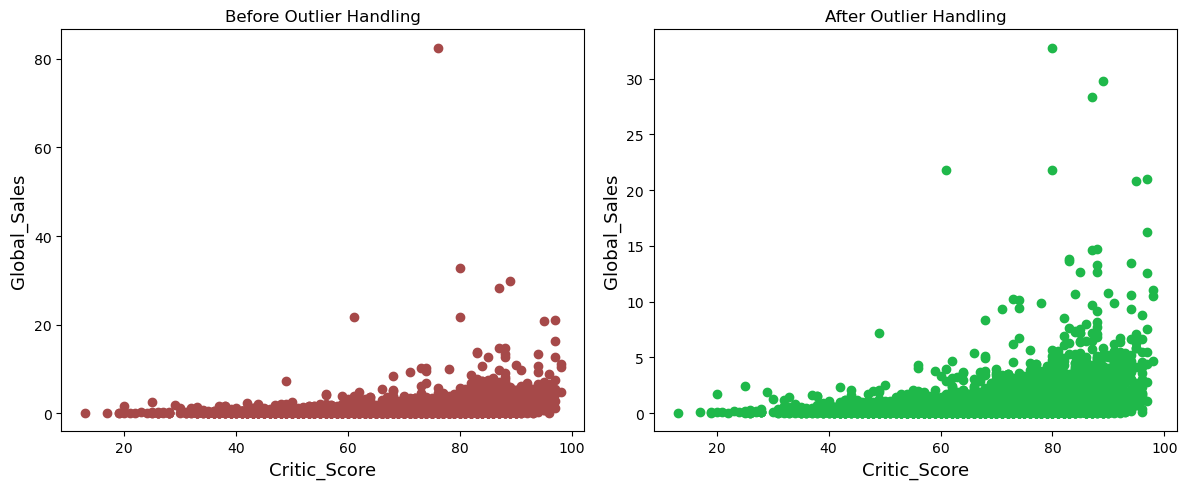


Fitted Parameters (before feature engineering): 
mu = 0.66 and sigma = 1.33



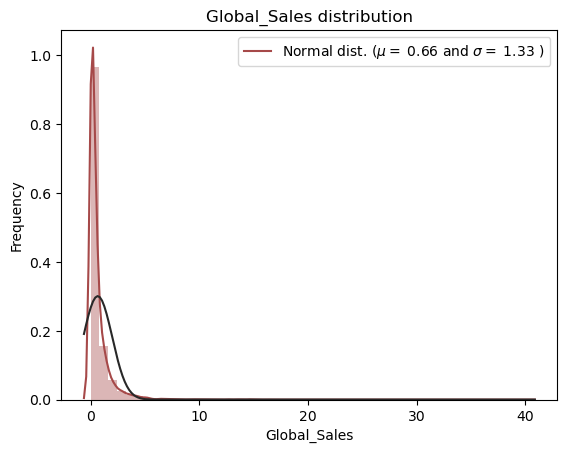

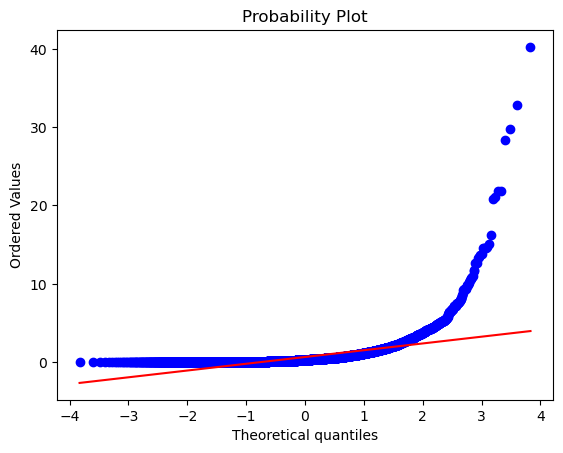

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
%matplotlib inline

# Read the dataset
data = pd.read_excel('final_dataset.xlsx')
data.head()

# size of data
print(data.shape)

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

################################################################################

# outlier detection and handling
# Step-1: Detection
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with two subplots side by side

# Plot 1: Before outlier handling
axs[0].scatter(x=data['Critic_Score'], y=data['Global_Sales'],color='#a64949')
axs[0].set_ylabel('Global_Sales', fontsize=13)
axs[0].set_xlabel('Critic_Score', fontsize=13)
axs[0].set_title('Before Outlier Handling')

# Step-2: Handling
data = data.drop(data[(data['Critic_Score'] > 60) & (data['Global_Sales'] > 60)].index)

# Plot 2: After outlier handling
axs[1].scatter(x=data['Critic_Score'], y=data['Global_Sales'],color='#1fb84a')
axs[1].set_ylabel('Global_Sales', fontsize=13)
axs[1].set_xlabel('Critic_Score', fontsize=13)
axs[1].set_title('After Outlier Handling')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

################################################################################

# Visualizing Target variable: Global_sales
sns.distplot(data['Global_Sales'] , fit=norm, color='#a64949');

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Global_Sales'])

print('\nFitted Parameters (before feature engineering): ')
print( 'mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Global_Sales distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['Global_Sales'], plot=plt)
plt.show()

### Correlation of Variables

Index(['Critic_Count', 'Critic_Score', 'EU_Sales', 'Global_Sales', 'JP_Sales',
       'NA_Sales', 'Other_Sales', 'User_Count', 'Year_of_Release'],
      dtype='object')


<Axes: title={'center': 'Pearson Correlation of Video Game Numerical Features'}>

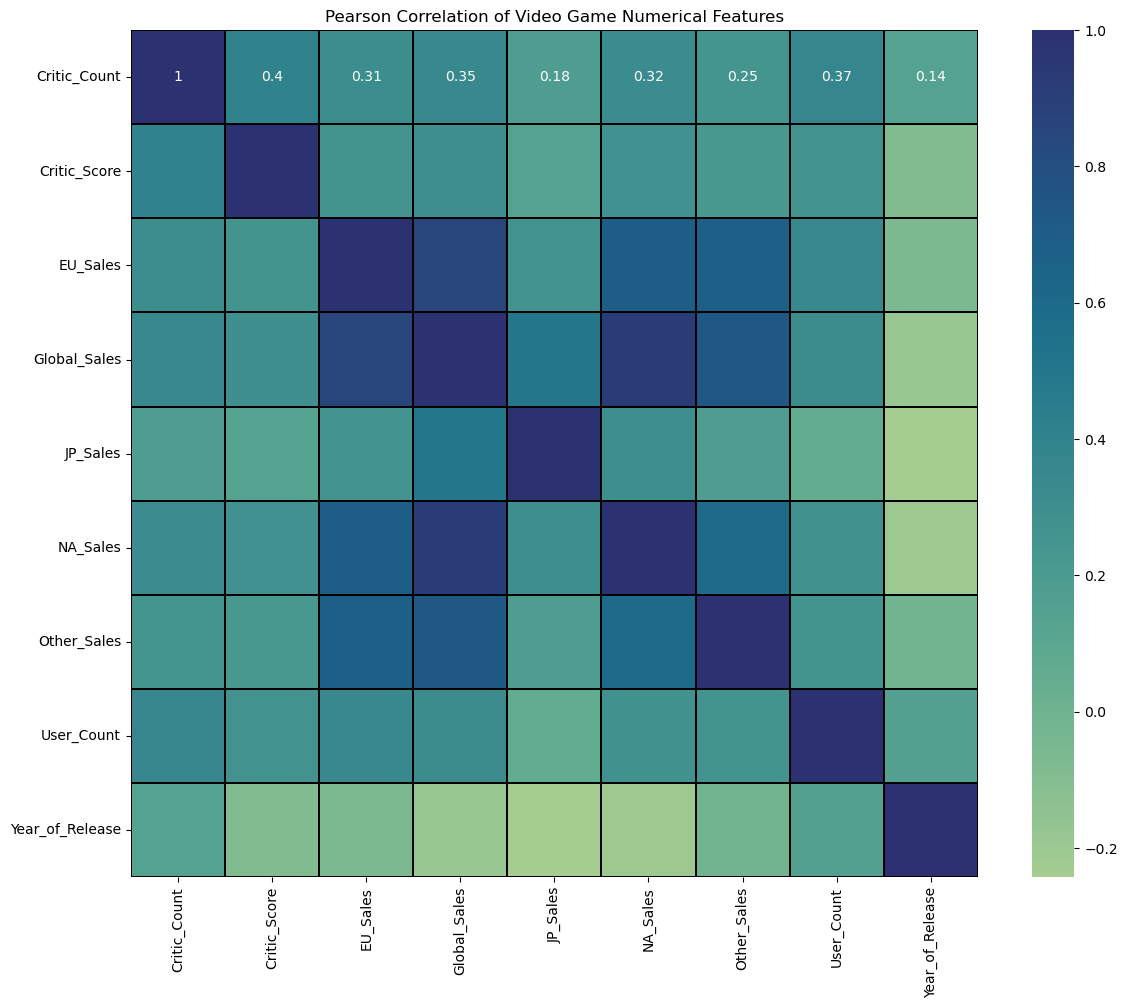

In [3]:
# Checking dependencies of variables using correlation heatmap
str_list = [] # empty list to contain columns with strings (words)
pd.DataFrame.iteritems = pd.DataFrame.items
for colname, colvalue in data.iteritems():
    if type(colvalue[0]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion
num_list = data.columns.difference(str_list)
print(num_list)
# Create Dataframe containing only numerical features
data_num = data[num_list]
f, ax = plt.subplots(figsize=(14, 11))
plt.title('Pearson Correlation of Video Game Numerical Features')
# Draw the heatmap using seaborn
sns.heatmap(data_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="crest", linecolor='k', annot=True,annot_kws={"size": 10})

## Feature Engineering

1. Handling missing values

In [4]:
# Handling missing values
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

# Checking number of values for each platform
print(pd.value_counts(data["Platform"]))

# Keeping only relevant and necessary platforms
data = data[(data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'X360') | (data['Platform'] == 'XOne') | (data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'PC')]

#Double check the value counts to be sure
print(pd.value_counts(data["Platform"]))

#See the shape of the data again
print('Shape: ',data.shape)

#See the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

################################################################################################

# Eliminating N/A values for the feature "Critic Score"
data = data.dropna(subset=['Critic_Score'])

#See the shape of the data again
print('Shape: ',data.shape)

#See the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
print(missing_data.head(16))

# Filling the remaining N/A values with appropriate method
# Publisher
data['Publisher'] = data['Publisher'].fillna(data['Publisher'].mode()[0])

# Developer
data['Developer'] = data['Developer'].fillna(data['Developer'].mode()[0])

# Rating
data['Rating'] = data['Rating'].fillna(data['Rating'].mode()[0])

# Year_of_release
data['Year_of_Release'] = data['Year_of_Release'].fillna(data['Year_of_Release'].median())

# User Score
#There's "tbd" values in the mix here which we need to handle first
data['User_Score'] = data['User_Score'].replace('tbd', None)
#Now we can handle the N/A's appropriately
data['User_Score'] = data['User_Score'].fillna(data['User_Score'].median())

# User count
data['User_Count'] = data['User_Count'].fillna(data['User_Count'].median())

#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
print(missing_data.head(16))

## No missing values

Platform
DS      1249
PS3     1239
X360    1100
Wii     1018
PS2      952
PSP      854
PC       743
3DS      520
PS       442
PSV      432
PS4      393
XB       381
GC       315
GBA      286
XOne     247
WiiU     147
N64      139
SNES      92
2600      86
NES       83
GB        56
SAT       32
DC        11
GEN       11
WS         2
SCD        1
NG         1
Name: count, dtype: int64
Platform
PS3     1239
X360    1100
Wii     1018
PC       743
PS4      393
XOne     247
WiiU     147
Name: count, dtype: int64
Shape:  (4887, 17)
Shape:  (3047, 17)
                 Missing Ratio
User_Count            4.594683
Rating                2.428618
Year_of_Release       2.330161
User_Score            0.525107
Publisher             0.098457
Developer             0.065638
Empty DataFrame
Columns: [Missing Ratio]
Index: []


2. Handling categorical variables

In [5]:
# Creating dummies for platform, genre, rating
print('Shape pre-dummies: ',data.shape) #pre-dummies shape
data = pd.get_dummies(data=data, columns=['Platform', 'Genre', 'Rating','Mode'])
print('Shape post-dummies: ',data.shape) #post-dummies shape

# Dropping features we wish to discard
data = data.drop(['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
print('New Columns: ', data.columns)

Shape pre-dummies:  (3047, 17)
Shape post-dummies:  (3047, 40)
New Columns:  Index(['Year_of_Release', 'Global_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_RP', 'Rating_T', 'Mode_Both', 'Mode_Multiplayer',
       'Mode_Singleplayer'],
      dtype='object')


## Dividing variables into featues and target

In [6]:
#Variables
X = data[['Year_of_Release', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_RP', 'Rating_T','Mode_Both', 'Mode_Multiplayer',
       'Mode_Singleplayer']]

#Target
Y = data[['Global_Sales']]


## Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

#Check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (2285, 32)
Y_train shape: (2285, 1)
X_test shape: (762, 32)
Y_test shape: (762, 1)


## Scaling Data


Fitted Parameters (after feature engineering): 

 mu = 0.47 and sigma = 0.48



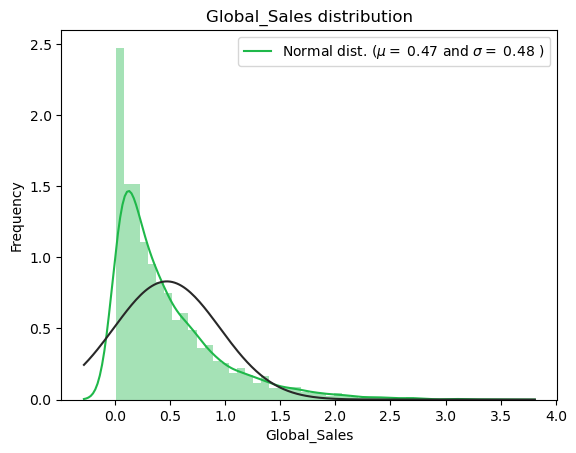

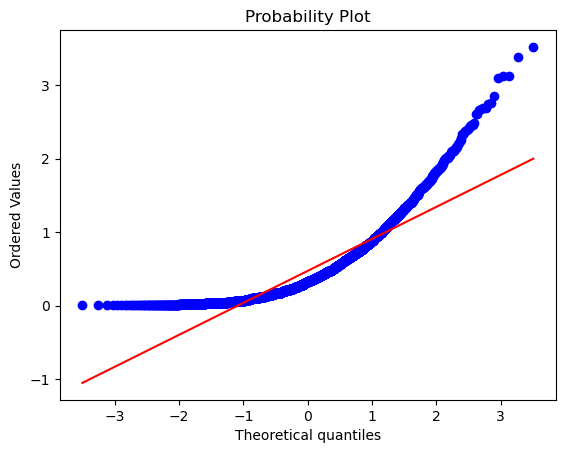

In [8]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

#Check the new distribution
Y_log_transformed = np.log1p(data['Global_Sales']) #For comparison to earlier, here's the whole Y transformed
sns.distplot(Y_log_transformed , fit=norm,color='#1fb84a');

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Y_log_transformed)
print('\nFitted Parameters (after feature engineering): ')
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Global_Sales distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(Y_log_transformed, plot=plt)
plt.show()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Grid preparation for models

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#Parameter grid for Support Vector Regressor
param_grid_svr = [
    {'C': [0.01, 0.1, 1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
     'kernel': ['rbf']}
]

#Parameter grid for Random Forest
param_grid_rf = [
    {'n_estimators': [3, 10, 30, 50, 70], 'max_features': [2,4,6,8,10,12], 'max_depth': [2, 3, 5, 7, 9]}
]

#Parameter grid for Gradient Boosting Regressor
param_grid_gbr = [
    {'n_estimators': [200, 225, 250, 275], 'max_features': [6, 8, 10, 12], 'max_depth': [5, 7, 9]}
]

# Parameter grid for k-NN
param_grid_knn = [
    {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
]

#Parameter grid for MLPRegressor.
#Current set of hyperparameters are the result of grid search that took forever.
param_grid_mlpr = [
    {'hidden_layer_sizes': [(10,5)], 'solver': ['lbfgs'], 'batch_size': [200],
     'learning_rate': ['adaptive'], 'max_iter': [800], 'verbose': [True],
     'nesterovs_momentum': [True], 'early_stopping': [True], 'validation_fraction': [0.12],
     'random_state': [100], 'alpha': [0.1], 'activation': ['logistic']}
]
# Parameter grid for SARIMA
# Adjust these parameters as needed based on your data and domain knowledge
param_grid_sarima = [
    {'order': [(1, 1, 1), (1, 1, 2), (2, 1, 1)],
     'seasonal_order': [(1, 1, 1, 12), (2, 1, 1, 12)]}
]

# Selecting Model

## Overall weighted average score:

- Mean Absolute Error (MAE): MAE measures the average absolute difference between the predicted values and the actual values.

- Mean Squared Error (MSE): MSE measures the average squared difference between the predicted values and the actual values.

- R-squared (R2): R-squared represents the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in the model.

- Best Cross Validation Score: Cross-validation helps assess the model's ability to generalize to unseen data by training the model on multiple subsets of the training data and evaluating it on the remaining data.

- Test Set Score: The test set score measures the model's performance on unseen data that was not used during training or model selection.

Test Set Score is given more importance (weight) because provides an indication of how well the model is expected to perform on new, unseen instances.

In [160]:
#Metrics for weighted average

# Assign weights
normalized_weights = {
    'MAE': -1,  # Equal weight
    'MSE': -1,  # Equal weight
    'R2': 1,   # Equal weight
    'Best Cross Validation Score': 1,  # Equal weight
    'Test Set Score': 2  # Higher weight
}


## Model 1: Support Vector Regressor

In [83]:
from sklearn.svm import SVR

grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, Y_train)

# Make predictions on the test set
svr_predictions = grid_search_svr.predict(X_test)

# Calculate regression evaluation metrics
svr_mae = mean_absolute_error(Y_test, svr_predictions)
svr_mse = mean_squared_error(Y_test, svr_predictions)
svr_r2 = r2_score(Y_test, svr_predictions)
svr_best_cross_val_score = (np.sqrt(-grid_search_svr.best_score_))
svr_score = np.sqrt(-grid_search_svr.score(X_test, Y_test))

# Print the results
print("Best parameters: {}".format(grid_search_svr.best_params_))
print("Mean Absolute Error: {:.2f}".format(svr_mae))
print("Mean Squared Error: {:.2f}".format(svr_mse))
print("R-squared: {:.2f}".format(svr_r2))
print("Best cross-validation score: {:.2f}".format(np.expm1(svr_best_cross_val_score)))
print("Test set score: {:.2f}".format(np.expm1(svr_score)))


Best parameters: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Mean Absolute Error: 0.24
Mean Squared Error: 0.15
R-squared: 0.39
Best cross-validation score: 0.48
Test set score: 0.47


In [161]:
# Multiply each metric by its weight
weighted_metrics = {
    'MAE': normalized_weights['MAE'] * svr_mae,
    'MSE': normalized_weights['MSE'] * svr_mse,
    'R2': normalized_weights['R2'] * svr_r2,
    'Best Cross Validation Score': normalized_weights['Best Cross Validation Score'] * svr_best_cross_val_score,
    'Test Set Score': normalized_weights['Test Set Score'] * svr_score
}

# Calculate the overall weighted average score
overall_score_svr = (sum(weighted_metrics.values()) + 2)/6

print("Overall Weighted Average Score (Support Vector Regressor): {:.4f}".format(overall_score_svr) )

Overall Weighted Average Score (Support Vector Regressor): 0.5269


## Model 2: Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, Y_train)

# Make predictions on the test set
rf_predictions = grid_search_rf.predict(X_test)

# Calculate regression evaluation metrics
rf_mae = mean_absolute_error(Y_test, rf_predictions)
rf_mse = mean_squared_error(Y_test, rf_predictions)
rf_r2 = r2_score(Y_test, rf_predictions)
rf_best_cross_val_score = (np.sqrt(-grid_search_rf.best_score_))
rf_score = np.sqrt(-grid_search_rf.score(X_test, Y_test))

# Print the results
print("Best parameters: {}".format(grid_search_rf.best_params_))
print("Mean Absolute Error: {:.2f}".format(rf_mae))
print("Mean Squared Error: {:.2f}".format(rf_mse))
print("R-squared: {:.2f}".format(rf_r2))
print("Best cross-validation score: {:.2f}".format(np.expm1(rf_best_cross_val_score)))
print("Test set score: {:.2f}".format(np.expm1(rf_score)))

Best parameters: {'max_depth': 9, 'max_features': 12, 'n_estimators': 70}
Mean Absolute Error: 0.19
Mean Squared Error: 0.09
R-squared: 0.65
Best cross-validation score: 0.35
Test set score: 0.34


In [162]:
# Multiply each metric by its weight
weighted_metrics = {
    'MAE': normalized_weights['MAE'] * rf_mae,
    'MSE': normalized_weights['MSE'] * rf_mse,
    'R2': normalized_weights['R2'] * rf_r2,
    'Best Cross Validation Score': normalized_weights['Best Cross Validation Score'] * rf_best_cross_val_score,
    'Test Set Score': normalized_weights['Test Set Score'] * rf_score
}

# Calculate the overall weighted average score
overall_score_rf = (sum(weighted_metrics.values()) + 2)/6

print("Overall Weighted Average Score (Random Forest): {:.4f}".format(overall_score_rf))

Overall Weighted Average Score (Random Forest): 0.5425


## Model 3: Gradient Booster

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

grid_search_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr.fit(X_train, Y_train)

# Make predictions on the test set
gbr_predictions = grid_search_gbr.predict(X_test)

# Calculate regression evaluation metrics
gbr_mae = mean_absolute_error(Y_test, gbr_predictions)
gbr_mse = mean_squared_error(Y_test, gbr_predictions)
gbr_r2 = r2_score(Y_test, gbr_predictions)
gbr_best_cross_val_score = (np.sqrt(-grid_search_gbr.best_score_))
gbr_score = np.sqrt(-grid_search_gbr.score(X_test, Y_test))

# Print the results
print("Best parameters: {}".format(grid_search_gbr.best_params_))
print("Mean Absolute Error: {:.2f}".format(gbr_mae))
print("Mean Squared Error: {:.2f}".format(gbr_mse))
print("R-squared: {:.2f}".format(gbr_r2))
print("Best cross-validation score: {:.2f}".format(np.expm1(gbr_best_cross_val_score)))
print("Test set score: {:.2f}".format(np.expm1(gbr_score)))


Best parameters: {'max_depth': 5, 'max_features': 6, 'n_estimators': 225}
Mean Absolute Error: 0.17
Mean Squared Error: 0.07
R-squared: 0.70
Best cross-validation score: 0.32
Test set score: 0.31


In [163]:
# Multiply each metric by its weight
weighted_metrics = {
    'MAE': normalized_weights['MAE'] * gbr_mae,
    'MSE': normalized_weights['MSE'] * gbr_mse,
    'R2': normalized_weights['R2'] * gbr_r2,
    'Best Cross Validation Score': normalized_weights['Best Cross Validation Score'] * gbr_best_cross_val_score,
    'Test Set Score': normalized_weights['Test Set Score'] * gbr_score
}

# Calculate the overall weighted average score
overall_score_gbr = (sum(weighted_metrics.values()) + 2)/6

print("Overall Weighted Average Score (Gradient Booster): {:.4f}".format(overall_score_gbr))

Overall Weighted Average Score (Gradient Booster): 0.5453


## Model 4: MLP Regressor (Neural Network)

In [89]:
from sklearn.neural_network import MLPRegressor

grid_search_mlpr = GridSearchCV(MLPRegressor(), param_grid_mlpr, cv=5, scoring='neg_mean_squared_error')
grid_search_mlpr.fit(X_train, Y_train)

# Make predictions on the test set
mlpr_predictions = grid_search_mlpr.predict(X_test)

# Calculate regression evaluation metrics
mlpr_mae = mean_absolute_error(Y_test, mlpr_predictions)
mlpr_mse = mean_squared_error(Y_test, mlpr_predictions)
mlpr_r2 = r2_score(Y_test, mlpr_predictions)
mlpr_best_cross_val_score = (np.sqrt(-grid_search_mlpr.best_score_))
mlpr_score = np.sqrt(-grid_search_mlpr.score(X_test, Y_test))

# Print the results
print("Best parameters: {}".format(grid_search_mlpr.best_params_))
print("Mean Absolute Error: {:.2f}".format(mlpr_mae))
print("Mean Squared Error: {:.2f}".format(mlpr_mse))
print("R-squared: {:.2f}".format(mlpr_r2))
print("Best cross-validation score: {:.2f}".format(np.expm1(mlpr_best_cross_val_score)))
print("Test set score: {:.2f}".format(np.expm1(mlpr_score)))


Best parameters: {'activation': 'logistic', 'alpha': 0.1, 'batch_size': 200, 'early_stopping': True, 'hidden_layer_sizes': (10, 5), 'learning_rate': 'adaptive', 'max_iter': 800, 'nesterovs_momentum': True, 'random_state': 100, 'solver': 'lbfgs', 'validation_fraction': 0.12, 'verbose': True}
Mean Absolute Error: 0.23
Mean Squared Error: 0.12
R-squared: 0.52
Best cross-validation score: 0.40
Test set score: 0.41


In [164]:
# Multiply each metric by its weight
weighted_metrics = {
    'MAE': normalized_weights['MAE'] * mlpr_mae,
    'MSE': normalized_weights['MSE'] * mlpr_mse,
    'R2': normalized_weights['R2'] * mlpr_r2,
    'Best Cross Validation Score': normalized_weights['Best Cross Validation Score'] * mlpr_best_cross_val_score,
    'Test Set Score': normalized_weights['Test Set Score'] * mlpr_score
}

# Calculate the overall weighted average score
overall_score_mlpr = (sum(weighted_metrics.values()) + 2)/6

print("Overall Weighted Average Score (MLP Regressor): {:.4f}".format(overall_score_mlpr))

Overall Weighted Average Score (MLP Regressor): 0.5316


## Model 5: K-Nearest Neighbours (KNN)

In [91]:
from sklearn.neighbors import KNeighborsRegressor

grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, Y_train)

# Make predictions on the test set
knn_predictions = grid_search_knn.predict(X_test)

# Calculate regression evaluation metrics
knn_mae = mean_absolute_error(Y_test, knn_predictions)
knn_mse = mean_squared_error(Y_test, knn_predictions)
knn_r2 = r2_score(Y_test, knn_predictions)
knn_best_cross_val_score = (np.sqrt(-grid_search_knn.best_score_))
knn_score = np.sqrt(-grid_search_knn.score(X_test, Y_test))

# Print the results
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Mean Absolute Error: {:.2f}".format(knn_mae))
print("Mean Squared Error: {:.2f}".format(knn_mse))
print("R-squared: {:.2f}".format(knn_r2))
print("Best cross-validation score: {:.2f}".format(np.expm1(knn_best_cross_val_score)))
print("Test set score: {:.2f}".format(np.expm1(knn_score)))


Best parameters: {'n_neighbors': 11, 'weights': 'distance'}
Mean Absolute Error: 0.28
Mean Squared Error: 0.16
R-squared: 0.34
Best cross-validation score: 0.52
Test set score: 0.49


In [165]:
# Multiply each metric by its weight
weighted_metrics = {
    'MAE': normalized_weights['MAE'] * knn_mae,
    'MSE': normalized_weights['MSE'] * knn_mse,
    'R2': normalized_weights['R2'] * knn_r2,
    'Best Cross Validation Score': normalized_weights['Best Cross Validation Score'] * knn_best_cross_val_score,
    'Test Set Score': normalized_weights['Test Set Score'] * knn_score
}

# Calculate the overall weighted average score
overall_score_knn = (sum(weighted_metrics.values()) + 2)/6

print("Overall Weighted Average Score (MLP Regressor): {:.4f}".format(overall_score_knn))

Overall Weighted Average Score (MLP Regressor): 0.5200


## Model Comparison

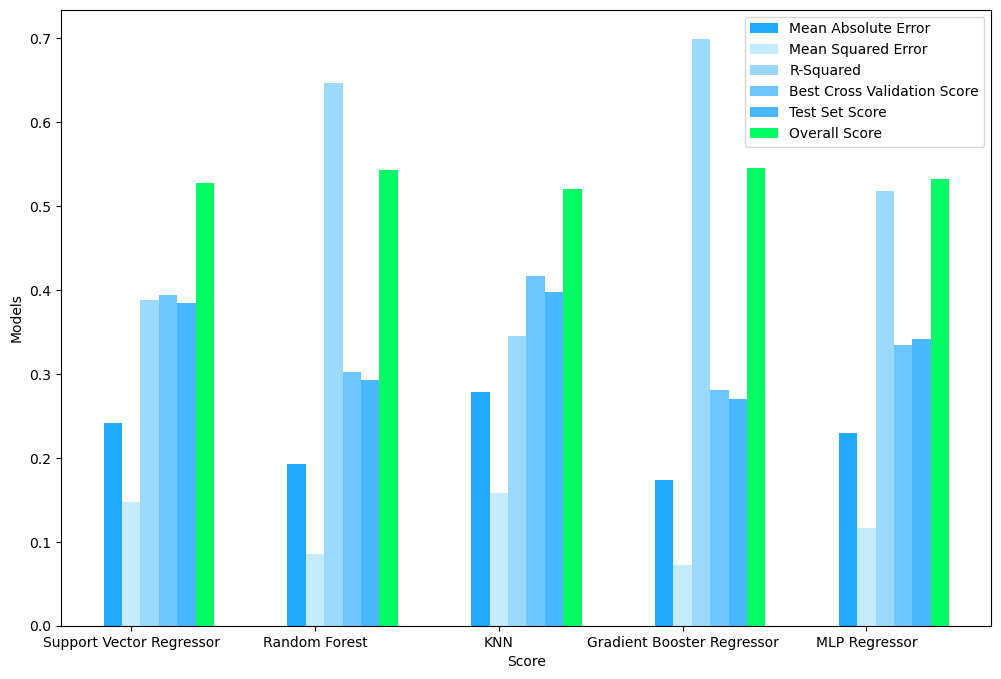

In [167]:
# Data for comparison
models = ['Support Vector Regressor', 'Random Forest', 'KNN','Gradient Booster Regressor', 'MLP Regressor']
mae_scores = [svr_mae, rf_mae,knn_mae, gbr_mae, mlpr_mae]
mse_scores = [svr_mse, rf_mse, knn_mse,gbr_mse, mlpr_mse]
r2_scores = [svr_r2, rf_r2,knn_r2, gbr_r2, mlpr_r2]
cv_scores = [svr_best_cross_val_score, rf_best_cross_val_score,knn_best_cross_val_score, gbr_best_cross_val_score, mlpr_best_cross_val_score]
test_scores = [svr_score, rf_score, knn_score, gbr_score, mlpr_score]
overall_scores = [overall_score_svr,overall_score_rf, overall_score_knn, overall_score_gbr, overall_score_mlpr]  # Assuming lower values are better for overall score

# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))

# set height of bar
IT = [12, 30, 1, 8, 22]
ECE = [28, 6, 16, 5, 10]
CSE = [29, 3, 24, 25, 17]

# Set position of bar on X axis
br1 = np.arange(len(models))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

# Make the plot
plt.bar(br1, mae_scores, color ='#21A9FF', width = barWidth, label ='Mean Absolute Error')
plt.bar(br2, mse_scores, color ='#C5EBFE', width = barWidth, label ='Mean Squared Error')
plt.bar(br3, r2_scores, color ='#9BD9FE', width = barWidth, label ='R-Squared')
plt.bar(br4, cv_scores, color ='#6DC6FE', width = barWidth, label ='Best Cross Validation Score')
plt.bar(br5, test_scores, color ='#48B7FF', width = barWidth, label ='Test Set Score')
plt.bar(br6, overall_scores, color ='#03fc66', width = barWidth, label ='Overall Score')

# Adding Xticks
plt.xlabel('Score')
plt.ylabel('Models')
plt.xticks([r + barWidth for r in range(len(models))], models)

plt.legend()
plt.show()

## Feature Importance

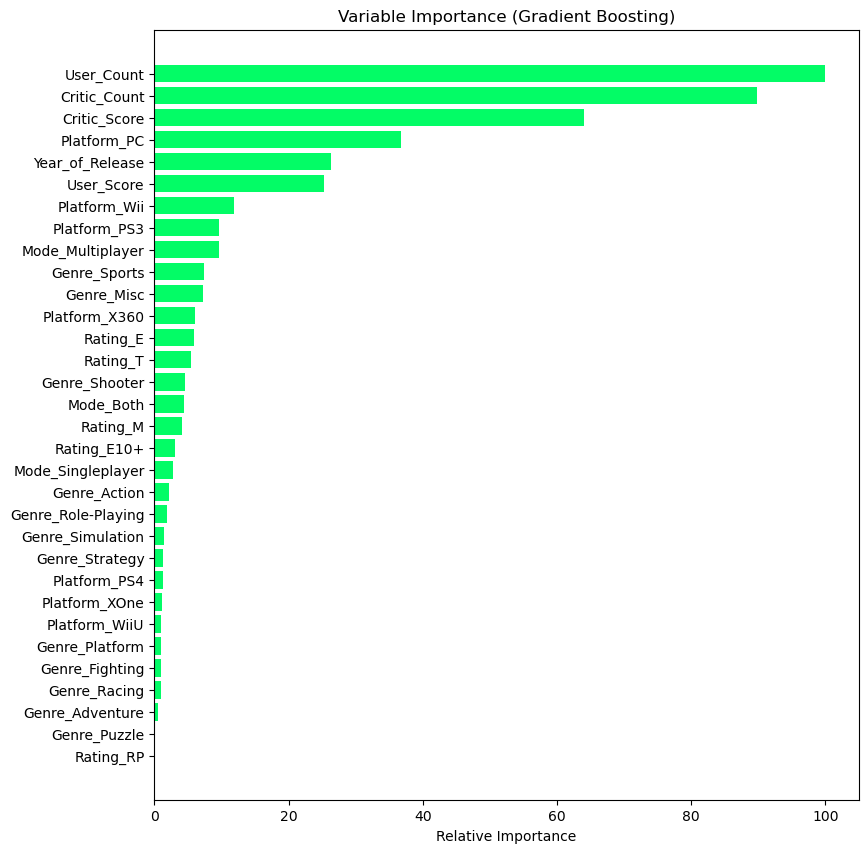

In [169]:
# Plot feature importance according to GradientBoostingRegressor
feature_importance = grid_search_gbr.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center', color ='#03fc66')
plt.yticks(pos, X_train.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance (Gradient Boosting)')
plt.show()

## Parallelization

In [172]:
from joblib import parallel_backend

grid_search_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, cv=5, scoring='neg_mean_squared_error')




def parallel_gbr(n_cores):
    grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')

    # Parallelize the grid search
    with parallel_backend('threading', n_jobs=n_cores):
        grid_search_gbr.fit(X_train, Y_train)

    # Make predictions and evaluate the model as usual
    with parallel_backend('threading', n_jobs=n_cores): 
        # Make predictions on the test set
        gbr_predictions = grid_search_gbr.predict(X_test)

## Comparison 

In [175]:
import os
import time

#Calculating time for 1(serial) - total no. of cores available
time_df = {}
for i in range(1, os.cpu_count()+1):
  start = time.time()
  parallel_svr(i)
  end = time.time()
  time_df[i] = end-start

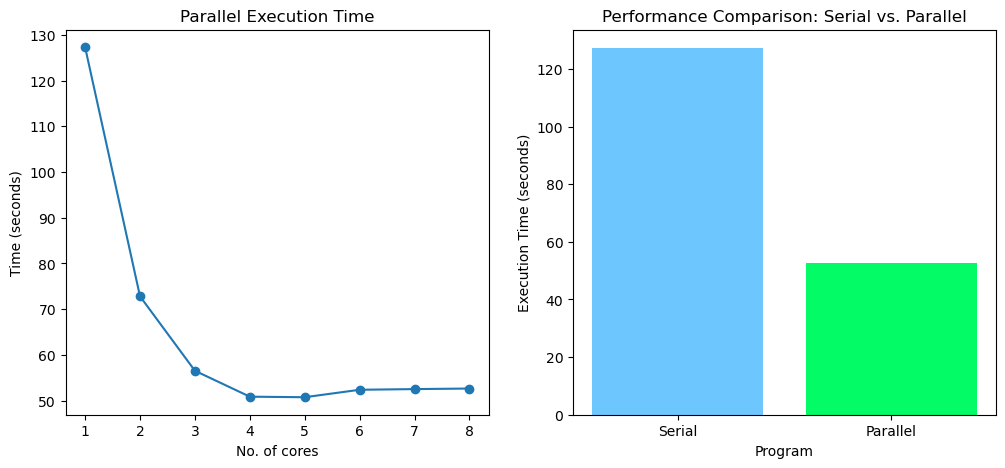

In [176]:
plt.figure(figsize=(12, 5))

# Plotting the line chart
plt.subplot(1, 2, 1)
plt.plot(time_df.keys(), time_df.values(), marker='o', linestyle='-')
plt.title('Parallel Execution Time')
plt.xlabel('No. of cores')
plt.ylabel('Time (seconds)')

# Plotting the bar graph
plt.subplot(1, 2, 2)
plt.bar(['Serial', 'Parallel'], [time_df[1], time_df[os.cpu_count()]], color=['#6DC6FE', '#03fc66'])
plt.xlabel('Program')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison: Serial vs. Parallel')

# plt.subplots_adjust(wspace=1)
plt.show()